In [0]:
import numpy as np

In [0]:
from math import e

In [0]:
import matplotlib.pyplot as plt

In [0]:
class neural_network(object):

  def sigmoid(self,x):
    s = 1/(1+e**(-x))
    return s

  def fit(self,x_train,y,k,n1,alpha=0.005,lamda=0):
    x=np.array(x_train)
    y=np.array(y)
    self.k=k
    m=x.shape[0]
    n=x.shape[1]
    self.theta1 = np.random.randn(n1,n+1)
    self.theta2 = np.random.randn(self.k,n1+1)
    X=np.zeros((m,n))
    for a in range(n):
      X[:,a]=(x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
    X=np.hstack((np.ones((m,1)),X))
    Y=np.zeros((m,self.k))
    for a in range(m):
      Y[a,y[a]]=1 
    self.l=[]
    self.p=[]
    a=50
    for b in range(2000):
      for i in range(int(m/a)):
        cost_func = (lamda/2)*(np.sum(self.theta1[:,1:]**2)+np.sum(self.theta2[:,1:]**2))
        Delta1 = np.zeros((n1,n+1))
        Delta2 = np.zeros((self.k,n1+1))
        a1 = X[i*a:i*a+a,:].T
        y1 = Y[i*a:i*a+a,:].T
        z2 = np.dot(self.theta1,a1)
        a2 = self.sigmoid(z2)
        a2 = np.vstack((np.ones((1,a)),a2))
        z3 = np.dot(self.theta2,a2)
        h = self.sigmoid(z3)
        cost_func += -np.sum(y1*np.log(h)+(1-y1)*np.log(1-h))
        delta3 = h-y1
        delta2 = np.dot(self.theta2[:,1:].T,delta3)*(a2[1:,:]*(1-a2[1:,:]))
        Delta1 += np.dot(delta2,a1.T)
        Delta2 += np.dot(delta3,a2.T)
        cost_func /= a
        D1 = np.zeros((n1,n+1))
        D2 = np.zeros((self.k,n1+1))
        D1[:,1:] = Delta1[:,1:]/a + (lamda/a)*self.theta1[:,1:]
        D1[:,0] = Delta1[:,0]/a
        D2[:,1:] = Delta2[:,1:]/a + (lamda/a)*self.theta2[:,1:]
        D2[:,0] = Delta2[:,0]/a
        self.theta1 = self.theta1 - (alpha)*D1
        self.theta2 = self.theta2 - (alpha)*D2
      self.l.append(cost_func)
      self.p.append(b)
    
  def get_params(self):
    print(self.theta1)
    print(self.theta2)

  def predict(self,x_test):
    x=np.array(x_test)
    m=x.shape[0]
    n=x.shape[1]
    X=np.zeros((m,n))
    for a in range(n):
      X[:,a]=(x[:,a]-np.mean(x[:,a]))/(np.std(x[:,a])+1e-09)
    X=np.hstack((np.ones((m,1)),X))
    y_pred = np.zeros((m,1))
    a=50
    for i in range(int(m/a)):
        a1 = X[i*a:i*a+a,:].T
        z2 = np.dot(self.theta1,a1)
        a2 = self.sigmoid(z2)
        a2 = np.vstack((np.ones((1,a)),a2))
        z3 = np.dot(self.theta2,a2)
        h = self.sigmoid(z3)
        y_pred[i*a:i*a+a] = np.argmax(h,axis=0).reshape((a,1))
    return y_pred

  def accuracy(self,y_pred,y_true):                                             
      p = 0
      m = len(y_true)
      for a in range(m):                                                        #classifies a prediction as correct only if it is equal to the original class
        if y_true[a]==y_pred[a]:                
          p+=1
      return (p*100)/m

  def split_train_test(self,X,y,split):                                         #splits the data into training set and testing set based on input split fraction
        m = size()
        n = split*np.size(y,axis=0)
        x_train = X[0:n,:]
        x_test = X[n:,:]
        y_train = y[0:n]
        y_test = y[n:]
        return x_train,x_test,y_train,y_test
        
  def plot(self):
    plt.plot(self.p,self.l)

In [0]:
import pandas as pd

In [0]:
df1 = pd.read_csv("sample_data/mnist_train_small.csv",header = None)

In [0]:
df2 = pd.read_csv("sample_data/mnist_test.csv",header = None)

In [0]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train = df1[0]

In [0]:
y_test = df2[0]

In [0]:
x_train = df1.drop(0,axis = 1,inplace = False)
x_train.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010800,0.010800,0.00045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012400,0.028450,0.058300,0.065500,0.127550,0.192350,...,3.713850,2.627100,1.718400,1.020050,0.553200,0.247400,0.097750,0.020750,0.00140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010650,0.036050,0.088300,0.112300,0.158500,0.276900,0.406050,0.546800,0.572050,0.696200,0.671650,0.54590,0.36630,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070711,1.527351,1.527351,0.06364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233338,1.986539,3.473241,3.100708,5.002952,5.989244,...,26.814446,22.334028,18.262349,14.000437,10.463161,6.750598,4.079011,1.322084,0.19799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049497,1.095078,2.220765,3.900047,4.749833,5.406638,7.005125,8.718932,10.378882,10.254588,11.457106,11.296983,10.05708,8.25534,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
x_test = df2.drop(0,axis = 1,inplace = False)

In [0]:
model = neural_network()

In [0]:
model.fit(x_train,y_train,10,40,0.01,0.15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.


In [0]:
y_pred = model.predict(x_train)
model.accuracy(y_pred,y_train)

95.49

In [0]:
y_pred = model.predict(x_test)
model.accuracy(y_pred,y_test)

93.82

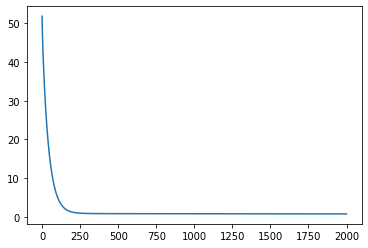

In [0]:
model.plot()